In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import random
import cv2 as cv
import os

## Evaluation

This is just for final validation and dispalying final mAP for segmentation

In [2]:
model = YOLO('yolov8x-seg.pt')
model = YOLO('/home/m/macko70/projects/yolov8/runs/segment/train13/weights/best.pt')
# metrics = model.val()

## Prediction

In [3]:
# pick one random image from validation set
image_dir = "/home/m/macko70/projects/yolov8/groceries_dataset/yolo_format_dataset/val/images/"
ann_dir = "/home/m/macko70/projects/yolov8/groceries_dataset/yolo_format_dataset/val/labels/"

file_list = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
random_file = random.choice(file_list)
image = image_dir + random_file
ann = ann_dir + random_file[:-4] + ".txt"

In [4]:
def generate_random_colors(n):
    colors = []
    for _ in range(n):
        colors.append((random.randint(50, 255), random.randint(50, 255), random.randint(50, 255)))
    return np.array(colors)

In [5]:
def color_masks(img, masks, masks_color):
    for mask, color in zip(masks, masks_color):
        masked_img = np.where(mask, color, img).astype(np.uint8)
        img = cv.addWeighted(img, 0.5, masked_img, 0.5, 0)
    return img

In [6]:
def get_segmentation_predictions(results):
    masks = []
    for i, seg_points in enumerate(results[0].masks.xy):
        mask = np.zeros_like(results[0].orig_img)
        masks.append(cv.fillPoly(mask, [seg_points.astype(int)], (255, 255, 255)))
    masks = np.stack(masks, axis=0)
    print(masks.shape)
    masks_colors = generate_random_colors(len(masks))
    img_with_predicted_mask = color_masks(results[0].orig_img, masks, masks_colors)
    return img_with_predicted_mask
    

In [7]:
def get_gt_segmentation(annotation_file):
    gt_seg_points = []
    with open(annotation_file, 'r') as file:
        for line in file:
            l = line.strip().split(" ")
            gt_seg_points.append(l[1:])
    return gt_seg_points        

In [8]:
a = get_gt_segmentation(ann)
print(a)

[['0.274225', '0.483161', '0.272771', '0.492228', '0.27374', '0.529145', '0.277132', '0.569301', '0.277616', '0.59456', '0.282946', '0.678756', '0.285368', '0.698834', '0.285853', '0.71956', '0.289244', '0.722798', '0.294089', '0.721503', '0.310562', '0.724741', '0.325581', '0.731218', '0.338663', '0.733808', '0.340601', '0.732513', '0.342054', '0.726036', '0.342054', '0.714378', '0.339147', '0.702073', '0.33624', '0.650259', '0.33188', '0.607513', '0.331395', '0.572539', '0.327519', '0.539508', '0.327035', '0.514249', '0.328488', '0.5', '0.324612', '0.494171', '0.320736', '0.492228']]


In [9]:
results = model(image)


image 1/1 /home/m/macko70/projects/yolov8/groceries_dataset/yolo_format_dataset/val/images/20210429_sevt_edelia_0985.png: 768x1024 1 default_category, 47.5ms
Speed: 5.4ms preprocess, 47.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


(1, 1544, 2064, 3)


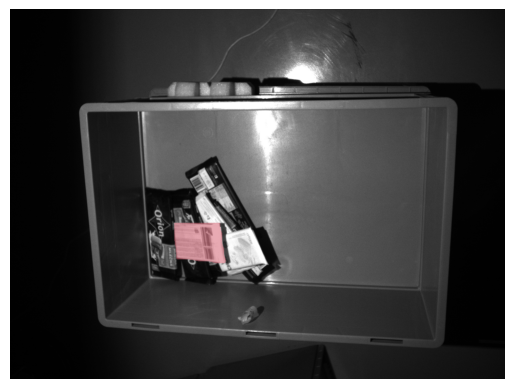

In [10]:
img_with_predicted_mask = get_segmentation_predictions(results=results)
plt.axis('off')
plt.imshow(img_with_predicted_mask)
plt.show()